In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
# 导入数据
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [3]:
# 生成笛卡尔坐标
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

In [4]:
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] == 0 #使得返还结果 y为列，x为行
        for n in range(len(x_data)):
                Z[j][i] += (y_data[n]-b-w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

In [19]:
# 计算b和w偏微分
# Linear regression
b = -120
w = -4
lr = 0.000001
iteration = 10000

b_history = [b]
w_history = [w]

lr_b=0
lr_w=0
#记录训练时间
import time
start = time.time()
for i in range(iteration):
    b_grad=0.0
    w_grad=0.0
    for n in range(len(x_data)):
        b_grad=b_grad-2.0*(y_data[n]-n-w*x_data[n])*1.0
        w_grad= w_grad-2.0*(y_data[n]-n-w*x_data[n])*x_data[n]
    
    lr_b=lr_b+b_grad**2
    lr_w=lr_w+w_grad**2
    #更新参数
    b -= lr/np.sqrt(lr_b) * b_grad
    w -= lr /np.sqrt(lr_w) * w_grad

    b_history.append(b)
    w_history.append(w)


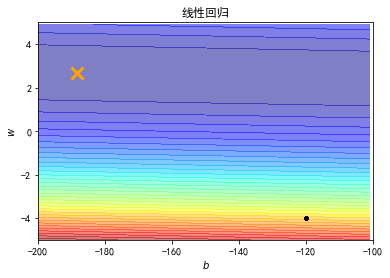

In [20]:
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()